In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-dataset-2017/IPL data/matches.csv
/kaggle/input/ipl-dataset-2017/IPL data/deliveries.csv


In [2]:
# read the matches dataset
matches=pd.read_csv('/kaggle/input/ipl-dataset-2017/IPL data/matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# lets explore the data a bit
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [4]:
# we can see NaN values in data 
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
matches.shape

(636, 18)

In [6]:
# third umpire value is null so remove them
matches=matches.drop('umpire3',axis=1)
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [7]:
# drop null values
matches=matches.dropna()
matches.shape

(625, 17)

In [8]:
# final check for null values
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               625 non-null    int64 
 1   season           625 non-null    int64 
 2   city             625 non-null    object
 3   date             625 non-null    object
 4   team1            625 non-null    object
 5   team2            625 non-null    object
 6   toss_winner      625 non-null    object
 7   toss_decision    625 non-null    object
 8   result           625 non-null    object
 9   dl_applied       625 non-null    int64 
 10  winner           625 non-null    object
 11  win_by_runs      625 non-null    int64 
 12  win_by_wickets   625 non-null    int64 
 13  player_of_match  625 non-null    object
 14  venue            625 non-null    object
 15  umpire1          625 non-null    object
 16  umpire2          625 non-null    object
dtypes: int64(5), object(12)
memory usag

# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter("ignore")

In [10]:
# Matches played per season
fig = px.bar(matches, x=matches['season'].value_counts().keys(), y=matches['season'].value_counts(), color=matches['season'].value_counts().keys(),
             labels={
                     'x': "Year",
                     'y': "Number of matches"
                     
                 })
fig.update_layout(title = 'Total matches per season')
fig.show()

In [11]:
#Show IPL teams
print("Teams before preprocessing:",matches.team1.unique())
matches=matches.replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches=matches.replace('Delhi Daredevils','Delhi Capitals')
print()
print("Teams before preprocessing:",matches.team1.unique())

Teams before preprocessing: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']

Teams before preprocessing: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']


In [12]:
matches_per_team1=matches.groupby('team2')['team2'].count()
matches_per_team2=matches.groupby('team1')['team1'].count()

matches_per_team=matches_per_team1+matches_per_team2
matches_per_team

team2
Chennai Super Kings            129
Deccan Chargers                 75
Delhi Capitals                 142
Gujarat Lions                   30
Kings XI Punjab                147
Kochi Tuskers Kerala            14
Kolkata Knight Riders          147
Mumbai Indians                 154
Pune Warriors                   45
Rajasthan Royals               116
Rising Pune Supergiants         30
Royal Challengers Bangalore    147
Sunrisers Hyderabad             74
dtype: int64

In [13]:
# Number of matches played per venue
fig = px.bar(matches, x=matches['venue'].value_counts().keys()[:5],
             y=matches['venue'].value_counts()[:5],
             color=matches['venue'].value_counts().keys()[:5],
             labels={
                     'x': "Venue",
                     'y': "Total number of matches"
                     
                 })
fig.update_layout(title='Total number of matches played')
fig.show()

In [14]:
# Find out valueable player throughout IPL seasons
fig = px.bar(matches, x=matches['player_of_match'].value_counts().keys()[:10],
             y=matches['player_of_match'].value_counts()[:10],
             color=matches['player_of_match'].value_counts().keys()[:10],
             labels={
                     'x': "Player Name",
                     'y': "Total number of player of the match award"
                     
                 })
fig.update_layout(title='Top ten most valuable players throught the IPL Seasons')
fig.show()

From the data we could see CH Gayle is the most valueable player

In [15]:
# find relation with toss
win=matches[matches['toss_winner']==matches['winner']].count()
loose=matches[matches['toss_winner']!=matches['winner']].count()

# matches won when won the toss
fig = px.bar(matches, x=[win[1],loose[1]],
             y=['win','loose'],
             color=['win','loose'],
             labels={
                     'x': "Number of matches won",
                     'y': "Match Result"
                     
                 })
fig.update_layout(title='Influence of toss on match result')
fig.show()

In [16]:
# Toss influence in each venue

chinnaswamy_win=matches[(matches['toss_winner']==matches['winner'])&(matches['venue']=='M Chinnaswamy Stadium')].count()[0]
chinnaswamy_loose=matches[(matches['toss_winner']!=matches['winner'])&(matches['venue']=='M Chinnaswamy Stadium')].count()[0]

Eden_win=matches[(matches['toss_winner']==matches['winner'])&(matches['venue']=='Eden Gardens')].count()[0]
Eden_loose=matches[(matches['toss_winner']!=matches['winner'])&(matches['venue']=='Eden Gardens')].count()[0]


Feroz_win=matches[(matches['toss_winner']==matches['winner'])&(matches['venue']=='Feroz Shah Kotla')].count()[0]
Feroz_loose=matches[(matches['toss_winner']!=matches['winner'])&(matches['venue']=='Feroz Shah Kotla')].count()[0]

Wankhede_win=matches[(matches['toss_winner']==matches['winner'])&(matches['venue']=='Wankhede Stadium')].count()[0]
Wankhede_loose=matches[(matches['toss_winner']!=matches['winner'])&(matches['venue']=='Wankhede Stadium')].count()[0]

RG_win=matches[(matches['toss_winner']==matches['winner'])&(matches['venue']=='Rajiv Gandhi International Stadium, Uppal')].count()[0]
RG_loose=matches[(matches['toss_winner']!=matches['winner'])&(matches['venue']=='Rajiv Gandhi International Stadium, Uppal')].count()[0]

fig = go.Figure(data=[
    go.Bar(name='Rajiv Gandhi International Stadium, Uppal', 
           x=['win','loose'],
           y=[RG_win,RG_loose]),
    go.Bar(name='Wankhede Stadium',
           x=['win','loose'], 
           y=[Wankhede_win,Wankhede_loose]),
    go.Bar(name='Feroz Shah Kotla', 
           x=['win','loose'],
           y=[Feroz_win,Feroz_loose]),
    go.Bar(name='Eden Gardens',
           x=['win','loose'], 
           y=[Eden_win,Eden_loose]),
    go.Bar(name='M Chinnaswamy Stadium', 
           x=['win','loose'],
           y=[chinnaswamy_win,chinnaswamy_loose]),
])

# Change the bar mode
fig.update_layout(title='Match results comparison with toss results in various venues')
fig.update_layout(
    xaxis_title="Win / loose",
    yaxis_title="Count",
    legend_title="Venue Name",
)
fig.show()

In [17]:
# decision influence of toss on result
winner_field=matches[(matches['toss_winner']==matches['winner'])& (matches['toss_decision']=='field')].count()[0]
winner_bat=matches[(matches['toss_winner']==matches['winner'])& (matches['toss_decision']!='field')].count()[0]
# matches won when won the toss
fig = px.bar(matches, x=[winner_field,winner_bat],
             y=['Field','Bat'],
             color=['Field','Bat'],
             labels={
                     'x': "Decision",
                     'y': "Count"
                     
                 })
fig.update_layout(title='Influence of toss Decision on match result')
fig.show()

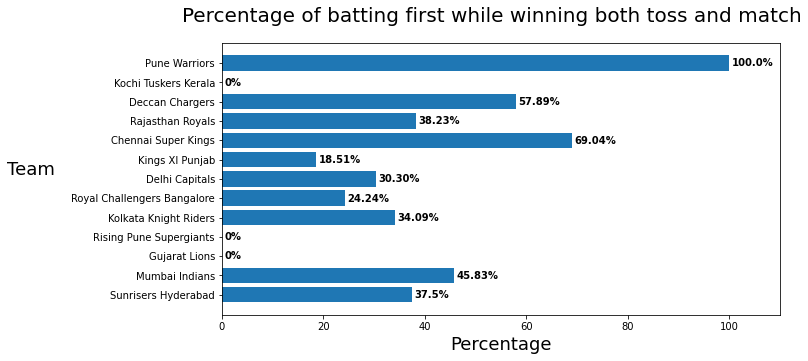

In [18]:
#Wins toss,bats first & wins match by team
seasons = matches['season'].unique()
teams = matches['team1'].unique()
df_toss_match_winner=matches[matches['toss_winner']==matches['winner']]
df_toss_match_winner_season=df_toss_match_winner.groupby('season')['season'].count()
df_toss_match_winner_team=df_toss_match_winner.groupby('winner')['winner'].count()
toss_batting_first=matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision']=='bat')]
toss_batting_first_team=toss_batting_first.groupby('toss_winner')['toss_winner'].count()
win_perc=[]
for i in teams:
    if i in toss_batting_first_team.keys() and i in df_toss_match_winner_team.keys():
        win_perc.append((toss_batting_first_team[i]/df_toss_match_winner_team[i])*100)
    else:
        win_perc.append(0)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,110)
rects=plt.barh(teams,win_perc)

for i, v in enumerate(win_perc):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage of batting first while winning both toss and match',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    teams[i]

plt.show()

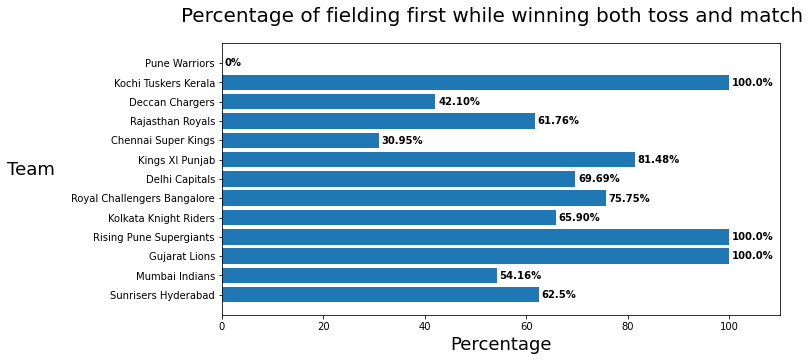

In [19]:
#Wins toss,fields first & wins match by team
toss_field_first=matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision']=='field')]
toss_field_first_season=toss_field_first.groupby('toss_winner')['toss_winner'].count()
win_perc=[]

for i in teams:
    if i in toss_field_first_season.keys() and i in df_toss_match_winner_team.keys():
        win_perc.append((toss_field_first_season[i]/df_toss_match_winner_team[i])*100)
    else:
        win_perc.append(0)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,110)
rects=plt.barh(teams,win_perc)

for i, v in enumerate(win_perc):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage of fielding first while winning both toss and match',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    teams[i]


plt.show()

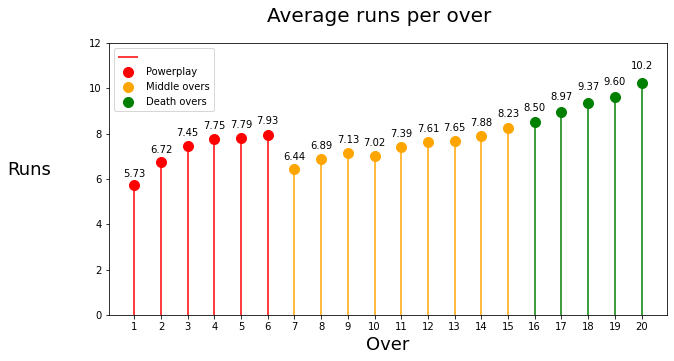

In [20]:
#Average runs per over
deliveries= pd.read_csv('/kaggle/input/ipl-dataset-2017/IPL data/deliveries.csv')

df_deliveries = deliveries

total_matches=len(df_deliveries['match_id'].unique())
overs=df_deliveries['over'].unique()
over_bowled=df_deliveries.groupby('over')['over'].count()/6
over_runs=df_deliveries.groupby('over').agg({'total_runs': 'sum'}).total_runs
rpo=over_runs/over_bowled

fig=plt.figure(figsize=(10,5))
plt.ylim(0,12)
rects=plt.bar(rpo.keys(),rpo.values,width=0)
plt.xticks(rpo.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(height)[:4],ha='center', va='bottom',color='black')

over_colors = ["red","red","red","red","red","red","orange","orange","orange","orange","orange","orange","orange","orange","orange","green","green","green","green","green"]
plt.vlines(rpo.keys(),0,rpo.values,color=over_colors,linestyles='solid')
plt.scatter(rpo.keys()[:6],rpo.values[:6], marker="o",s=100,color="red")
plt.scatter(rpo.keys()[6:15],rpo.values[6:15], marker="o",s=100,color="orange")
plt.scatter(rpo.keys()[15:],rpo.values[15:], marker="o",s=100,color="green")
    
    
fig.suptitle('Average runs per over',fontsize=20)
plt.xlabel('Over', fontsize=18)
plt.ylabel('Runs', fontsize=18,rotation=0,labelpad=60)

plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()

In [21]:
# Let us look the same for our venues

chinnaswamy_field=matches[(matches['toss_winner']==matches['winner'])&
                        (matches['venue']=='M Chinnaswamy Stadium')&
                        (matches['toss_decision']=='field')].count()[0]
chinnaswamy_bat=matches[(matches['toss_winner']!=matches['winner'])&
                          (matches['venue']=='M Chinnaswamy Stadium')&
                          (matches['toss_decision']!='field')].count()[0]

Eden_field=matches[(matches['toss_winner']==matches['winner'])&
                 (matches['venue']=='Eden Gardens')&
                 (matches['toss_decision']=='field')].count()[0]
Eden_bat=matches[(matches['toss_winner']!=matches['winner'])&
                   (matches['venue']=='Eden Gardens')&
                   (matches['toss_decision']!='field')].count()[0]


Feroz_field=matches[(matches['toss_winner']==matches['winner'])&
                  (matches['venue']=='Feroz Shah Kotla')&
                  (matches['toss_decision']=='field')].count()[0]
Feroz_bat=matches[(matches['toss_winner']!=matches['winner'])&
                    (matches['venue']=='Feroz Shah Kotla')&
                    (matches['toss_decision']!='field')].count()[0]

Wankhede_field=matches[(matches['toss_winner']==matches['winner'])&
                     (matches['venue']=='Wankhede Stadium')& 
                     (matches['toss_decision']=='field')].count()[0]
Wankhede_bat=matches[(matches['toss_winner']!=matches['winner'])
                       &(matches['venue']=='Wankhede Stadium')
                       & (matches['toss_decision']!='field')].count()[0]

RG_field=matches[(matches['toss_winner']==matches['winner'])
               &(matches['venue']=='Rajiv Gandhi International Stadium, Uppal')& 
               (matches['toss_decision']=='field')].count()[0]
RG_bat=matches[(matches['toss_winner']!=matches['winner'])&
                 (matches['venue']=='Rajiv Gandhi International Stadium, Uppal')
                 & (matches['toss_decision']!='field')].count()[0]

fig = go.Figure(data=[
    go.Bar(name='Rajiv Gandhi International Stadium, Uppal', 
           x=['Field','Bat'],
           y=[RG_field,RG_bat]),
    go.Bar(name='Wankhede Stadium',
           x=['Field','Bat'], 
           y=[Wankhede_field,Wankhede_bat]),
    go.Bar(name='Feroz Shah Kotla', 
           x=['Field','Bat'],
           y=[Feroz_field,Feroz_bat]),
    go.Bar(name='Eden Gardens',
           x=['Field','Bat'], 
           y=[Eden_field,Eden_bat]),
    go.Bar(name='M Chinnaswamy Stadium', 
           x=['Field','Bat'],
           y=[chinnaswamy_field,chinnaswamy_bat]),
])
# Change the bar mode
fig.update_layout(title='Match results comparison with toss Decision results in various venues')
fig.update_layout(
    xaxis_title="Field / Bat",
    yaxis_title="Count",
    legend_title="Venue Name",
)
fig.show()

In [22]:
# teams with most wins
matches['winner'].value_counts()[:5]

# Number of matches played per venue
fig = px.bar(matches, x=matches['winner'].value_counts().keys()[:5],
             y=matches['winner'].value_counts()[:5],
             color=matches['winner'].value_counts().keys()[:5],
             labels={
                     'x': "Team name",
                     'y': "Total number of Matches Won"
                     
                 })
fig.update_layout(title='Top five most consistant teams throught the IPL Seasons')
fig.show()

In [23]:
Mumbai_field=matches[(matches['winner']=='Mumbai Indians')& 
        (matches['toss_winner']=='Mumbai Indians')&
       (matches['toss_decision']=='field')].count()[0]
Mumbai_bat=matches[(matches['winner']=='Mumbai Indians')& 
        (matches['toss_winner']=='Mumbai Indians')&
       (matches['toss_decision']!='field')].count()[0]

Kolkata_field=matches[(matches['winner']=='Kolkata Knight Riders')& 
        (matches['toss_winner']=='Kolkata Knight Riders')&
       (matches['toss_decision']=='field')].count()[0]
Kolkata_bat=matches[(matches['winner']=='Kolkata Knight Riders')& 
        (matches['toss_winner']=='Kolkata Knight Riders')&
       (matches['toss_decision']!='field')].count()[0]

Chennai_field=matches[(matches['winner']=='Chennai Super Kings')& 
        (matches['toss_winner']=='Chennai Super Kings')&
       (matches['toss_decision']=='field')].count()[0]
Chennai_bat=matches[(matches['winner']=='Chennai Super Kings')& 
        (matches['toss_winner']=='Chennai Super Kings')&
       (matches['toss_decision']!='field')].count()[0]

Bangalore_field=matches[(matches['winner']=='Royal Challengers Bangalore')& 
        (matches['toss_winner']=='Royal Challengers Bangalore')&
       (matches['toss_decision']=='field')].count()[0]
Bangalore_bat=matches[(matches['winner']=='Royal Challengers Bangalore')& 
        (matches['toss_winner']=='Royal Challengers Bangalore')&
       (matches['toss_decision']!='field')].count()[0]

Punjab_field=matches[(matches['winner']=='Kings XI Punjab')& 
        (matches['toss_winner']=='Kings XI Punjab')&
       (matches['toss_decision']=='field')].count()[0]
Punjab_bat=matches[(matches['winner']=='Kings XI Punjab')& 
        (matches['toss_winner']=='Kings XI Punjab')&
       (matches['toss_decision']!='field')].count()[0]

fig = go.Figure(data=[
    go.Bar(name='Mumbai Indians', 
           x=['Field','Bat'],
           y=[Mumbai_field,Mumbai_bat]),
    go.Bar(name='Kolkata Knight Riders',
           x=['Field','Bat'], 
           y=[Kolkata_field,Kolkata_bat]),
    go.Bar(name='Chennai Super Kings', 
           x=['Field','Bat'],
           y=[Chennai_field,Feroz_bat]),
    go.Bar(name='Royal Challengers Bangalore',
           x=['Field','Bat'], 
           y=[Bangalore_field,Bangalore_bat]),
    go.Bar(name='Kings XI Punjab', 
           x=['Field','Bat'],
           y=[Punjab_field,Punjab_bat]),
])


# Change the bar mode
fig.update_layout(title='Match results comparison with toss Decision results in various Teams')
fig.update_layout(
    xaxis_title="Field / Bat",
    yaxis_title="Count",
    legend_title="Team Name",
)
fig.show()

In [24]:
# Number of times 10 wicket victory
matches[matches['win_by_wickets']==10]['winner'].value_counts()

Royal Challengers Bangalore    2
Kings XI Punjab                1
Chennai Super Kings            1
Rajasthan Royals               1
Delhi Capitals                 1
Deccan Chargers                1
Mumbai Indians                 1
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
Name: winner, dtype: int64

In [25]:
#teams with 10 wicket victory
fig = px.pie(matches,
             values=matches[matches['win_by_wickets']==10]['winner'].value_counts(), 
             names=matches[matches['win_by_wickets']==10]['winner'].value_counts().keys(),
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title='Teams with 10 wicket victory',
    legend_title="Team Name "
)
fig.show()

In [26]:
matches[matches['win_by_runs']>50]['winner'].value_counts()

Chennai Super Kings            11
Mumbai Indians                  9
Royal Challengers Bangalore     7
Rajasthan Royals                6
Kings XI Punjab                 4
Deccan Chargers                 3
Delhi Capitals                  3
Kolkata Knight Riders           2
Rising Pune Supergiants         1
Sunrisers Hyderabad             1
Name: winner, dtype: int64

In [27]:
# sub plot piecharts
from plotly.subplots import make_subplots


fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Win By Runs >50', 'Win by 10 wickets'])

fig.add_trace(go.Pie(labels=matches[matches['win_by_runs']>50]['winner'].value_counts().keys(),
                     values=matches[matches['win_by_runs']>50]['winner'].value_counts(),
                     scalegroup='one',
                    ),
                      1, 1)

fig.add_trace(go.Pie(labels=matches[matches['win_by_wickets']==10]['winner'].value_counts().keys(), 
                     values=matches[matches['win_by_wickets']==10]['winner'].value_counts(), 
                     scalegroup='one'), 1, 2)

fig.update_layout(
    title='Brilliant performance by various teams',
    legend_title="Team Name",
)
fig.show()

In [28]:
umpire1=matches['umpire1'].value_counts()
umpire2=matches['umpire2'].value_counts()
new_umpire={}
for i in umpire1.keys():
    if i in umpire2:
        new_umpire[i]=umpire1[i]+umpire2[i]
    else:
        new_umpire[i]=umpire1[i]


fig = px.bar(matches, x=list(new_umpire.keys())[:5],
             y=list(new_umpire.values())[:5],
             color=list(new_umpire.keys())[:5],
             labels={
                     'x': "Umpire Name",
                     'y': "Total number of Matches"
                     
                 })
fig.update_layout(title='Top five most consistant Umpires throught the IPL Seasons')
fig.show()

In [29]:
#load deliveries dataset
deliveries= pd.read_csv('/kaggle/input/ipl-dataset-2017/IPL data/deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [30]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [31]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


# Data Analysis

In [32]:
fig = px.bar(matches, x=deliveries['dismissal_kind'].value_counts().keys(),
             y=deliveries['dismissal_kind'].value_counts(),
             color=deliveries['dismissal_kind'].value_counts().keys(),
             labels={
                     'x': "Medium of Dismissal",
                     'y': "Total number of Dismissals"
                     
                 })
fig.update_layout(title='Number of Dismissials')
fig.show()

In [33]:
print("Number of super overs {}".format(len(deliveries[deliveries['is_super_over']==1]['match_id'].unique())))

Number of super overs 7


In [34]:
bowlers=dict.fromkeys(list(deliveries['bowler'].unique()),0)
wicket_bowls=deliveries[deliveries.player_dismissed.isnull()==False]
for i in range(wicket_bowls.shape[0]):
    bowlers[wicket_bowls.iloc[i]['bowler']]+=1
bowlers=dict(sorted(bowlers.items(), key=lambda item: item[1],reverse=True))
y=list(bowlers.values())[:20]
x=list(bowlers.keys())[:20]
bw=x
fig = px.scatter(x=x, y=y ,color=x, size=y , labels={
                     'x': "Bowler Name",
                     'y': "Number of wickets",
                     'color':'Player Name'
                     
                 })
fig.update_layout(title='Number of dismissal by each bowler (Top 20)')
fig.show()

In [35]:
deliveries['batsman_runs'].value_counts()

fig = px.bar(matches, x=deliveries['batsman_runs'].value_counts().keys(),
             y=deliveries['batsman_runs'].value_counts(),
             color=deliveries['batsman_runs'].value_counts().keys(),
             labels={
                     'x': "Run value",
                     'y': "Total number"
                     
                 })
fig.update_layout(title='Count for each Run types')
fig.show()

In [36]:
cre_runs=deliveries['batsman_runs'].value_counts()
print(cre_runs)

0    61148
1    55497
4    17033
2     9705
6     6523
3      509
5       45
Name: batsman_runs, dtype: int64


In [37]:
wides=deliveries['wide_runs'].sum()
bye=deliveries['bye_runs'].sum()
legbye=deliveries['legbye_runs'].sum()
noball=deliveries['noball_runs'].sum()
penalty=deliveries['penalty_runs'].sum()

y=[wides,bye,legbye,noball,penalty]
x=['wide_runs','bye_runs','legbye_runs','noball_runs', 'penalty_runs']
fig = px.pie(deliveries,
             values=y, 
             names=x)
fig.update_layout(
    title='Extra Runs',
    legend_title="Extra Runs medium "
)
fig.show()

In [38]:
bowlers=dict.fromkeys(deliveries['bowler'].unique(),0)
for i in range(deliveries.shape[0]):
    if deliveries.iloc[i]['wide_runs']>0:
        bowlers[deliveries.iloc[i]['bowler']]+=1
bowlers=dict(sorted(bowlers.items(), key=lambda item: item[1],reverse=True))
y=list(bowlers.values())[:5]
x=list(bowlers.keys())[:5]

fig = px.scatter(x=x, y=y ,color=x, size=y , labels={
                     'x': "Bowler Name",
                     'y': "Number of wide balls",
                     'color':'Player Name'
                     
                 })
fig.update_layout(title='Number of wides by each bowler (Top 5)')
fig.show()

In [39]:
bowlers=dict.fromkeys(deliveries['bowler'].unique(),0)
for i in range(deliveries.shape[0]):
    if deliveries.iloc[i]['bye_runs']>0:
        bowlers[deliveries.iloc[i]['bowler']]+=1
bowlers=dict(sorted(bowlers.items(), key=lambda item: item[1],reverse=True))
y=list(bowlers.values())[:5]
x=list(bowlers.keys())[:5]

fig = px.scatter(x=x, y=y ,color=x, size=y , labels={
                     'x': "Bowler Name",
                     'y': "Number of byes balls",
                     'color':'Player Name'
                     
                 })
fig.update_layout(title='Number of byes by each bowler (Top 5)')
fig.show()

In [40]:
bowlers=dict.fromkeys(deliveries['bowler'].unique(),0)
for i in range(deliveries.shape[0]):
    if deliveries.iloc[i]['noball_runs']>0:
        bowlers[deliveries.iloc[i]['bowler']]+=1
bowlers=dict(sorted(bowlers.items(), key=lambda item: item[1],reverse=True))
y=list(bowlers.values())[:5]
x=list(bowlers.keys())[:5]

fig = px.scatter(x=x, y=y ,color=x, size=y , labels={
                     'x': "Bowler Name",
                     'y': "Number of noball balls",
                     'color':'Player Name'
                     
                 })
fig.update_layout(title='Number of noball by each bowler (Top 5)')
fig.show()